In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
"# Read and parse timing data\n",
timing_stats = {}
with open('arena_corr_TPCC_times.txt', 'r') as f:
    for line in f:
        data = eval(line.strip())
        name = data["name"]
        time = data["time"]
        if name not in timing_stats:
            timing_stats[name] = []
        timing_stats[name].append(time / 10)

k-smf-k=5 avg 0.7966
k-smf-twisted-k=5 avg 3.4655
k-smf-oracle-k=5 avg 1.0815
k-smf-oracle-2-phase-k=5 avg 0.9903
k-smf-twisted-oracle-2-phase-k=5 avg 2.4241
RL-ordered k-smf n=50 T=7 avg 56.8014
RL-ordered k-smf n=20 T=7 avg 9.4886


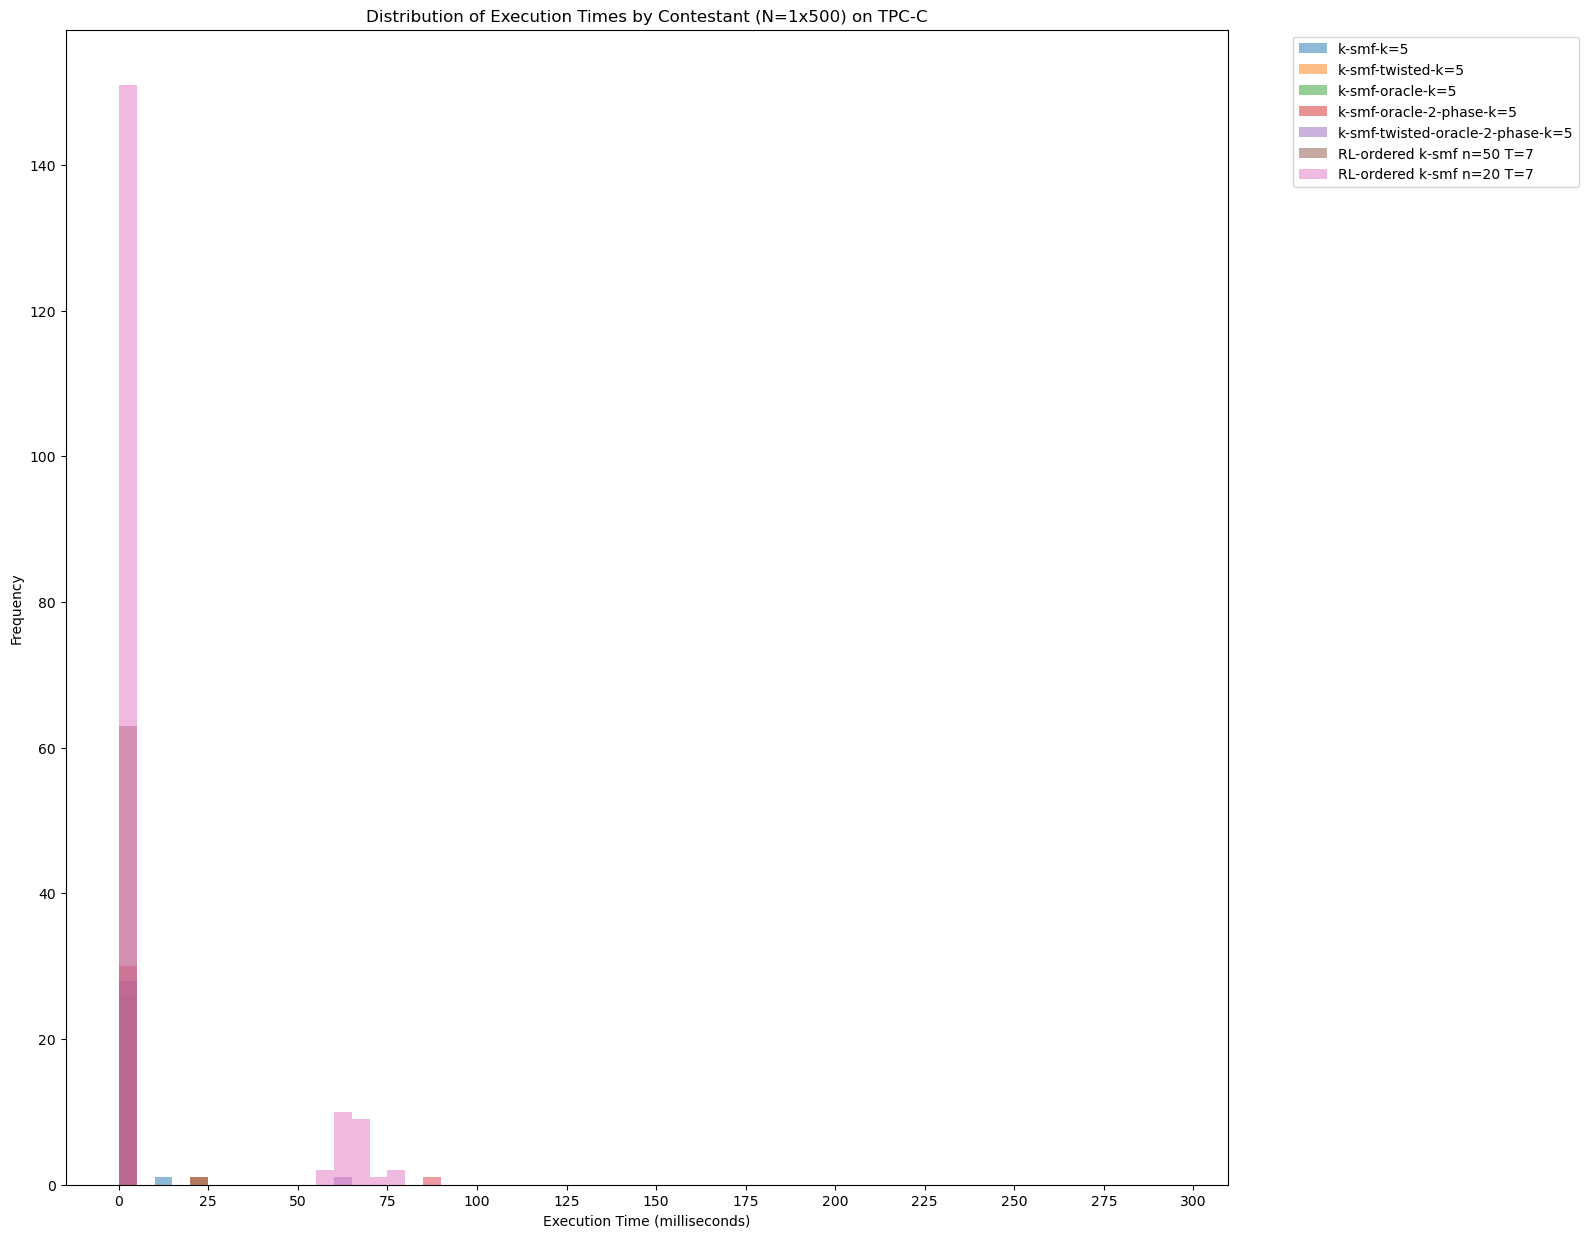

In [3]:
"# Plot histogram for each contestant\n",
plt.figure(figsize=(15,15))
for name in timing_stats.keys():
    plt.hist(timing_stats[name], alpha=0.5, label=name, bins=range(0, 300, 5))
    print(name, 'avg', f'{sum(timing_stats[name]) / len(timing_stats[name]):.4f}')
    # plt.plot([elem["steps"] for elem in stats[contestant] if elem["steps"] < t_cutoff], [elem["n_aborts"] for elem in stats[contestant] if elem["steps"] < t_cutoff], label=f"{contestant}-aborts")
plt.xlabel('Execution Time (milliseconds)')
plt.ylabel('Frequency')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.gca().xaxis.set_major_locator(plt.LogLocator(base=10, numticks=15))  # Reduce number of ticks
# plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())  # Use regular number formatting

plt.title('Distribution of Execution Times by Contestant (N=1x500) on TPC-C')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, which="both", ls="-", alpha=0.9)
# plt.tight_layout()
plt.show()